In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
headbrain=pd.read_csv("headbrain.csv")

In [3]:
headbrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [4]:
headbrain.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
headbrain.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [6]:
headbrain.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


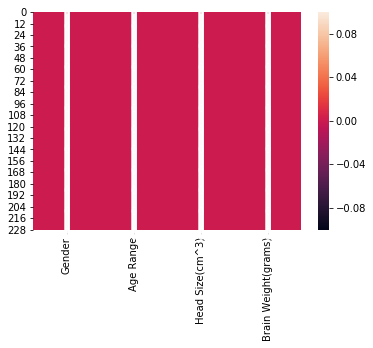

In [7]:
sns.heatmap(headbrain.isnull(),annot=True)   
plt.show()

In [8]:
headbrain.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [9]:
headbrain.shape

(237, 4)

In [12]:
headbrain.nunique()

Gender                   2
Age Range                2
Head Size(cm^3)        221
Brain Weight(grams)    146
dtype: int64

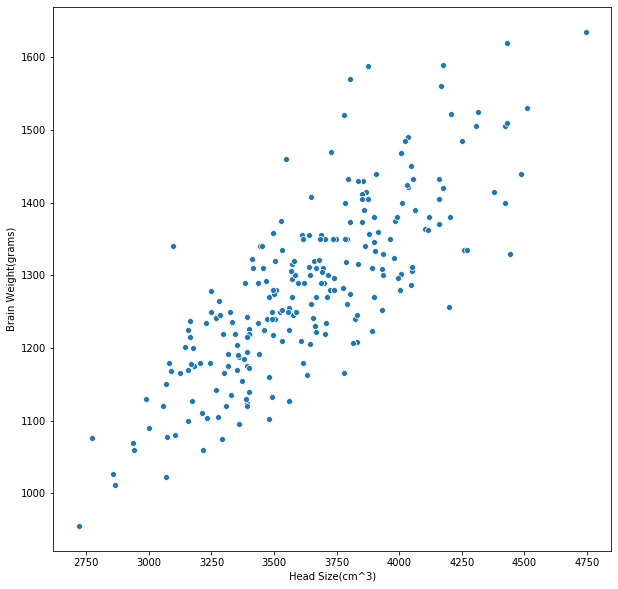

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='Brain Weight(grams)',x='Head Size(cm^3)',data=headbrain)
plt.show()

In [19]:
from scipy.stats import zscore
z_score=abs(zscore(headbrain))
print(headbrain.shape)
headbrain_final=headbrain.loc[(z_score<3).all(axis=1)]
print(headbrain_final.shape)

(237, 4)
(236, 4)


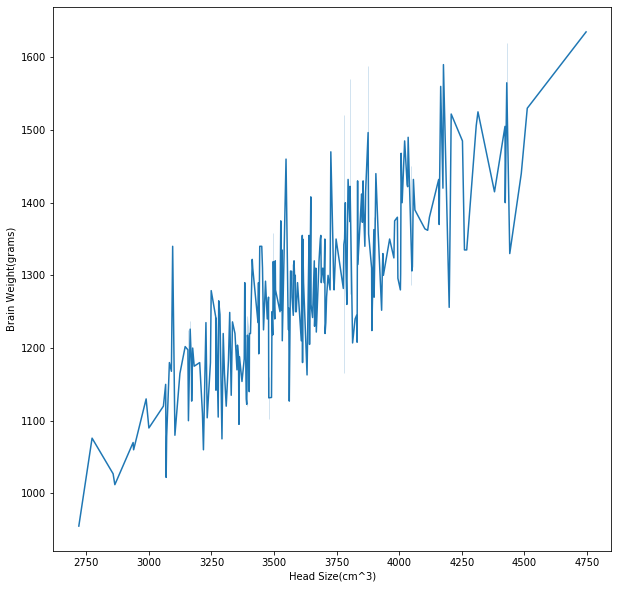

In [20]:
plt.figure(figsize=(10,10))
sns.lineplot(y='Brain Weight(grams)',x='Head Size(cm^3)',data=headbrain)
plt.show()

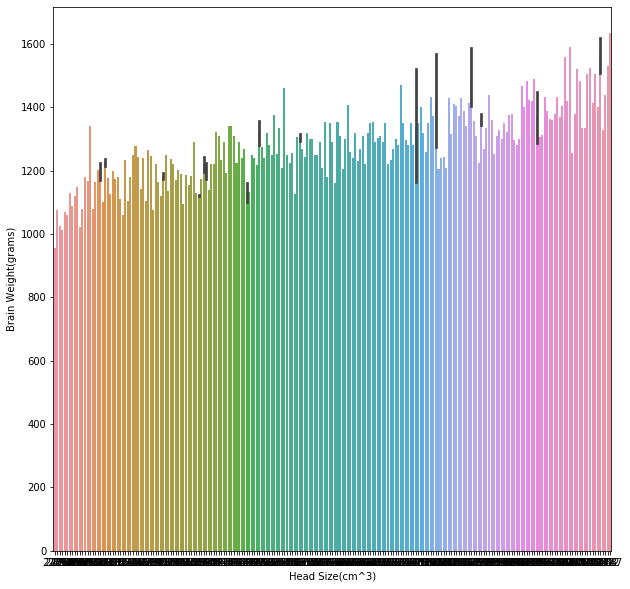

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(y='Brain Weight(grams)',x='Head Size(cm^3)',data=headbrain)
plt.show()

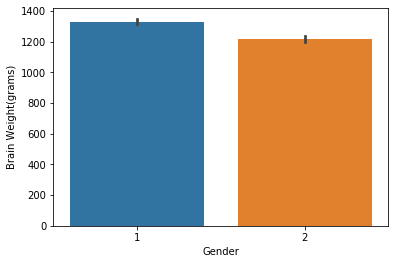

In [23]:
sns.barplot(x=headbrain["Gender"],y=headbrain["Brain Weight(grams)"],data=headbrain)
plt.show()

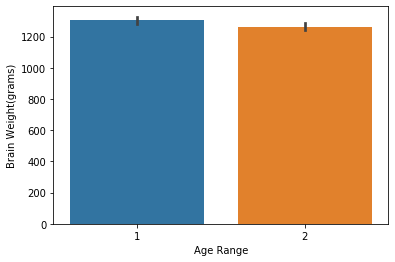

In [24]:
sns.barplot(x=headbrain["Age Range"],y=headbrain["Brain Weight(grams)"],data=headbrain)
plt.show()

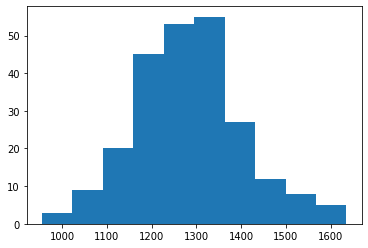

In [27]:
plt.hist(x="Brain Weight(grams)",bins=10,data=headbrain)
plt.show()

In [28]:
headbrain.skew()

Gender                 0.265554
Age Range             -0.144748
Head Size(cm^3)        0.238807
Brain Weight(grams)    0.265478
dtype: float64

In [36]:
x = headbrain[["Head Size(cm^3)"]]
y = headbrain[["Brain Weight(grams)"]]
x,y

(     Head Size(cm^3)
 0               4512
 1               3738
 2               4261
 3               3777
 4               4177
 ..               ...
 232             3214
 233             3394
 234             3233
 235             3352
 236             3391
 
 [237 rows x 1 columns],      Brain Weight(grams)
 0                   1530
 1                   1297
 2                   1335
 3                   1282
 4                   1590
 ..                   ...
 232                 1110
 233                 1215
 234                 1104
 235                 1170
 236                 1120
 
 [237 rows x 1 columns])

In [37]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x

array([[ 2.40886829],
       [ 0.28535333],
       [ 1.72023489],
       [ 0.39235214],
       [ 1.4897759 ],
       [-0.13441126],
       [ 0.41430062],
       [-0.2057438 ],
       [-0.05759159],
       [ 0.95478182],
       [-0.52399669],
       [ 0.98496097],
       [ 0.01648451],
       [ 1.57482624],
       [ 0.54324791],
       [ 0.66396452],
       [-0.37584448],
       [-0.46089482],
       [-1.47875536],
       [ 2.16743507],
       [ 0.66945164],
       [ 1.13036962],
       [ 0.46642825],
       [ 0.20853367],
       [ 3.05360475],
       [ 2.16469151],
       [ 1.10293403],
       [ 1.06452419],
       [-0.49381754],
       [ 1.48428878],
       [ 0.41978774],
       [ 0.44447977],
       [ 1.28675251],
       [ 1.44587895],
       [ 1.43764827],
       [ 0.49386384],
       [-0.2935377 ],
       [ 0.31278892],
       [-0.82304466],
       [-0.38956228],
       [ 0.89991063],
       [-0.35389601],
       [ 1.8683871 ],
       [ 0.46642825],
       [ 0.62829825],
       [ 1

In [42]:
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is: ",max_r_score)

r2 score corresponding to random state:  42 is:  0.7149168473012075
r2 score corresponding to random state:  43 is:  0.6404165530671619
r2 score corresponding to random state:  44 is:  0.653010968876236
r2 score corresponding to random state:  45 is:  0.6939862623941999
r2 score corresponding to random state:  46 is:  0.5332650244375814
r2 score corresponding to random state:  47 is:  0.6201411206780885
r2 score corresponding to random state:  48 is:  0.6851449361873334
r2 score corresponding to random state:  49 is:  0.6433491336855989
r2 score corresponding to random state:  50 is:  0.7683161771318532
r2 score corresponding to random state:  51 is:  0.5935686929145347
r2 score corresponding to random state:  52 is:  0.6342022687682457
r2 score corresponding to random state:  53 is:  0.5909146568147448
r2 score corresponding to random state:  54 is:  0.6130331905389369
r2 score corresponding to random state:  55 is:  0.5884150240645216
r2 score corresponding to random state:  56 is:  

In [43]:
from sklearn.model_selection  import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y, cv=5,scoring="r2").mean()

0.4936984443261272

In [44]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 50,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict((x_test))

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print(("r2 score is: ",r2_score(y_test,y_pred)))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

('r2 score is: ', 0.7683161771318532)
RMSE is : 60.36773435476799


In [50]:
from sklearn.externals import joblib
joblib.dump(lr, "lr_headbrain.pk1")

C:\Users\A587479\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lr_headbrain.pk1']